<h1 align=center>Assignment 2</h1>

<h2 align=center>Hierachical Clustering</h2>
    
---

**Group**: 9 (Gagandeep Singh | Simranpreet Singh | Suraj)
### Data:
Obtained from Credit Card Dataset for Clustering | Kaggle, original source unknown.

### Problem Statement:
The marketing department for a credit card company wants to learn more about the different kinds of customers they have in order to develop a marketing strategy that targets each group separately. As a data scientist, your job is to find the best way to divide the customers into groups, and to develop a description of each group to be used by the marketing strategists.

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

<h2 align=center>Data</h2>

---

In [2]:
# loading dataset to Pandas DataFrame
df = pd.read_csv("CC GENERAL.csv")

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000



### Data Overview:
Teh dataset contains various columns that explains credit card usage and behaviour for different customers. Below is an explanation of each column and observations based on the summary statistics. 

#### Columns:
* **CUST_ID**: Identification of the card holder (Categorical)
* **BALANCE**: Balance amount left in their account to make purchases.
* **BALANCE_FREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES**: Amount of purchases made from account
* **ONEOFF_PURCHASES**: Maximum purchase amount done in one-go
* **INSTALLMENTS_PURCHASES**: Amount of purchase done in installment
* **CASH_ADVANCE**: Cash in advance given by the user
* **PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFF_PURCHASES_FREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASES_INSTALLMENTS_FREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASH_ADVANCE_FREQUENCY**: How frequently the cash in advance being paid
* **CASH_ADVANCE_TRX**: Number of Transactions made with "Cash in Advanced"
* **PURCHASES_TRX**: Numbe of purchase transactions made
* **CREDIT_LIMIT**: Limit of Credit Card for user
* **PAYMENTS**: Amount of Payment done by user
* **MINIMUM_PAYMENTS**: Minimum amount of payments made by user
* **PRC_FULL_PAYMENT**: Percent of full payment paid by user
* **TENURE**: Tenure of credit card service for user

#### Observation:
1. **Balance and Payments**: The balance varies across customers, with some having very high outstanding amounts. Paymetns made by cutomers also range from 0 to significant amounts, indicating diverse financial behaviour. 
1. **Purchase Behavior**: Some customers make frequent purchaseds, as indicated by the high purchases vs. installment purchases based on the `ONEOFF_PURCHAES_FREQUENCY` and `PURCHASES_INSTALLMENTS_FREQUENCY`.   
1. **Credit Limit**: There is a wide range in credit limits, from as low as `$50` to `$30,000`, with a median value of `$3,000`. This suggests varied creditworthiness among the customer base. 
1. **Cash Advances**: A relatively low number of customers appear to frequently use cash advances, as indicated by the low mean and median of `CASH_ADVANCE_FREQUENCY` and `CASH_ADVANCE_TRX`.
1. **Minimum Payments**:  Some customers are only making the minimum payments, while others are paying off their balance fully, as indicated by the wide range in `MINIMUM_PAYMENTS` and `PRC_FULL_PAYMENT`.
This dataset provides insight into customer credit card usage, including spending habits, credit management, and financial behavior. ​


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Check for duplicate records. 
df.duplicated().sum()

0

In [6]:
# check for null values. 
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# Looking at the records with null values. 
df[df.isna().any(axis=1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [8]:
# Drop records with null values. 
df = df.dropna()

In [9]:
# Drop the CUST_ID column
df = df.drop(['CUST_ID'],axis=1)

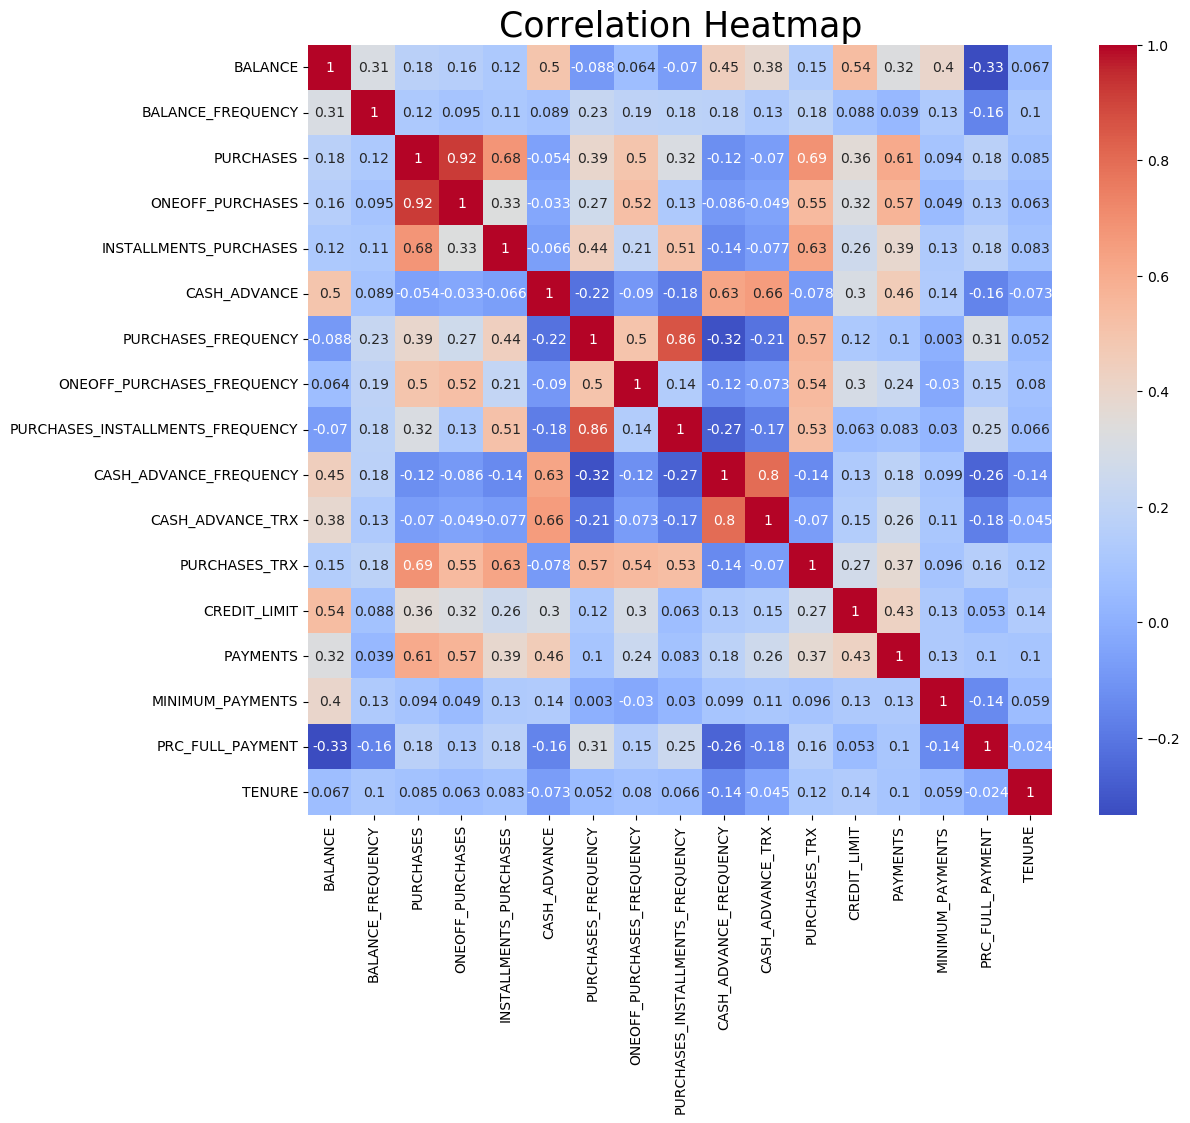

In [10]:
# Heatmap of correlations between the columns
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=25)
plt.show()

In [11]:
# sns.pairplot(df)
# plt.title("PairPlot", fontsize=25)
# plt.show()

#### Observations:
Based on the heatmap we can infer that there are bunch of highly correlated pairs of columns such as 
* `PURCHASES` X `ONEOFF_PURCHASES`
* `PURCHASES_INSTALLMENTS_FREQUENCY` X `PURCHASES_FREQUENCY`
* `CASH_ADVANCE_FREQUENCY` X `CASH_ADVANCE_TRX`
* `PURCHASES` X `PURCHASE_TRX`
* `PURCHASES` X `INSTALLMENT_PURCHASES`
and more....

The Pairplot also clearly depicts these correlations. 


<h2 align=center>Modeling</h2>

---

In [13]:
# Creating MinMaxScaler() object
scaler = StandardScaler()

# Fit the scaler to the data. 
scaler.fit(df)

# Transform the data and store in new DataFrame
df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


In [14]:
pca = PCA()

In [16]:
df_pca = pca.fit_transform(df_scaled)

In [18]:
df_pca.shape

(8636, 17)

In [19]:
# Elgin Value

pca.explained_variance_

array([4.62983620e+00, 3.46403341e+00, 1.51629231e+00, 1.28766257e+00,
       1.06714866e+00, 9.71286112e-01, 8.35848726e-01, 7.15907723e-01,
       6.25960921e-01, 5.23917010e-01, 4.01893153e-01, 3.01706671e-01,
       2.42568833e-01, 2.00395358e-01, 1.71396366e-01, 4.61029927e-02,
       1.17321400e-05])

In [20]:
# Elgin Vector

pca.explained_variance_ratio_

array([2.72311770e-01, 2.03743076e-01, 8.91833372e-02, 7.57360860e-02,
       6.27661816e-02, 5.71278613e-02, 4.91618788e-02, 4.21073427e-02,
       3.68169669e-02, 3.08150790e-02, 2.36380362e-02, 1.77453962e-02,
       1.42671026e-02, 1.17865972e-02, 1.00809717e-02, 2.71162672e-03,
       6.90045972e-07])

In [21]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27231177, 0.47605485, 0.56523818, 0.64097427, 0.70374045,
       0.76086831, 0.81003019, 0.85213753, 0.8889545 , 0.91976958,
       0.94340762, 0.96115301, 0.97542011, 0.98720671, 0.99728768,
       0.99999931, 1.        ])

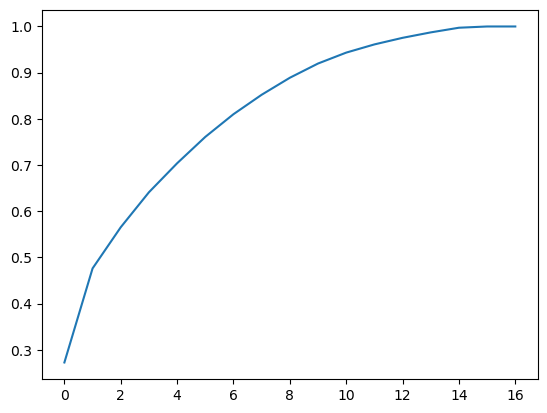

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [23]:
pca = PCA(11)

In [24]:
df_pca = pca.fit_transform(df_scaled)

In [34]:
df_pca_pd = pd.DataFrame(data= df_pca)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,-0.093970,-0.016190,-0.082402,-0.216529
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,-0.045119,0.754617,-0.748468,-0.878351
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0.073401,-0.837066,-0.034854,-0.746798
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,0.063548,0.566940,-0.083532,-0.466749
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,-0.089942,0.365857,-0.192647,-0.194651
...,...,...,...,...,...,...,...,...,...,...,...
8631,-2.221637,-1.328411,1.643826,-1.421354,-0.175573,3.518499,-1.313848,-0.870622,-0.590283,-0.185911,-0.536715
8632,-0.362326,-2.032249,-0.875053,-2.800940,-0.313566,2.808854,-1.549426,-0.210773,1.342838,-0.745134,0.163099
8633,-0.930026,-1.841236,-0.350037,-2.351591,-0.219492,3.090269,-1.421757,-0.630976,0.558226,-0.779909,0.129506
8634,-2.356010,-0.718730,1.048522,-1.776467,-0.552690,3.333452,-0.996810,-0.263088,0.972588,0.340042,-0.332938


### Agglomerative Clustering

In [25]:
# Define the parameter grid
param_grid = {
    'n_clusters': [2,3,4,5,6],
    'metric': ['euclidean'],
    'linkage': ['ward', 'complete', 'average', 'single']
}

best_score = -1
best_params = None

# Initialize a dictionary to store silhouette scores for each parameter combination
silhouette_scores = []
score_df = pd.DataFrame()

for params in ParameterGrid(param_grid):
    # Create the Agglomerative Clustering model
    model = AgglomerativeClustering(n_clusters=params['n_clusters'], linkage=params['linkage']).fit(df_pca)
    
    # Calculate silhouette score (or other metrics)
    score = silhouette_score(df_pca, model.labels_)
    
    # Append the score and the corresponding parameters
    silhouette_scores.append((params, score))

       # Compare and store best model
    if score > best_score:
        best_score = score
        best_params = params

    # Storing the scores with params in a DataFrame
    params_temp = params.copy()
    params_temp['score'] = score
    score_df = pd.concat([score_df, pd.DataFrame(params_temp, index=[0])], ignore_index=True)

In [27]:
score_df.sort_values('score', ascending=False).reset_index(drop=True)

,linkage,metric,n_clusters,score
0,average,euclidean,2,0.850654
1,single,euclidean,2,0.838579
2,average,euclidean,3,0.837629
3,single,euclidean,3,0.837629
4,single,euclidean,4,0.835232
5,complete,euclidean,2,0.790340
6,complete,euclidean,3,0.789944
7,average,euclidean,4,0.789555
8,complete,euclidean,4,0.789402
9,single,euclidean,6,0.788212


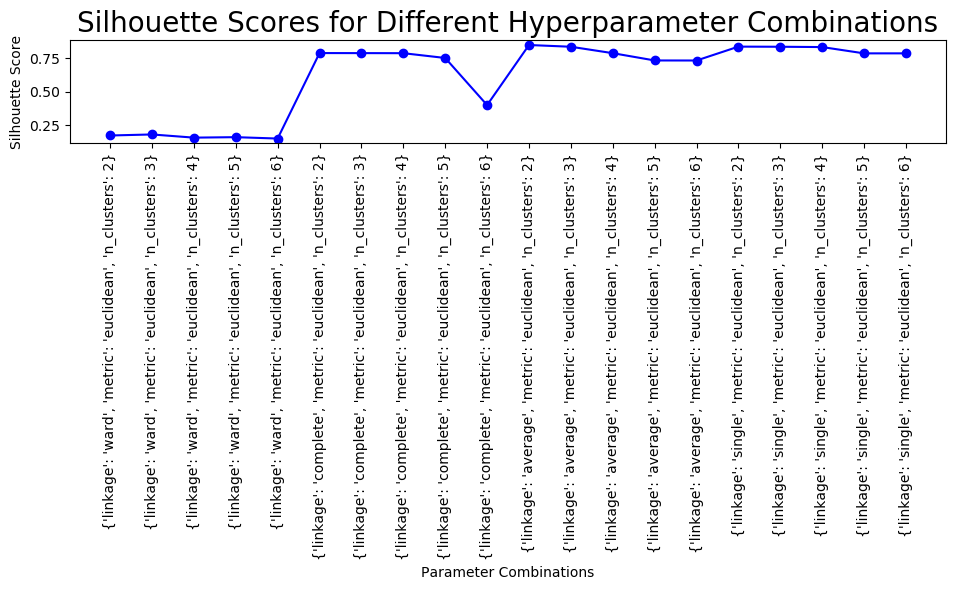

In [28]:
# Extract scores and params for plotting
scores = [score for _, score in silhouette_scores]
params = [str(param) for param, _ in silhouette_scores]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(len(scores)), scores, marker='o', linestyle='-', color='b')
plt.xticks(range(len(params)), params, rotation=90)  # Set the x-tick labels to the parameter combinations
plt.xlabel('Parameter Combinations')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Hyperparameter Combinations', size=20)
plt.tight_layout()
plt.show()

In [30]:
# assigning best cluster parametes

best_cluster = AgglomerativeClustering(n_clusters=3, linkage='average').fit(df_pca).labels_

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

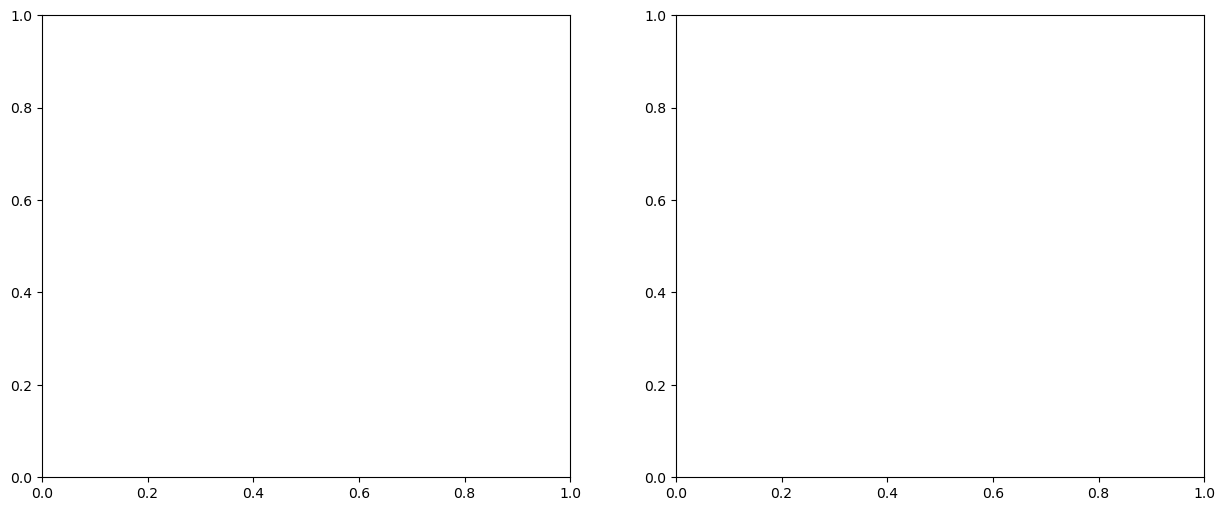

In [32]:
# Custom legend labels based on clusters
unique_clusters = np.unique(best_cluster)  # Extract unique cluster labels
scatter_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))  # Generate colors from cmap

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# First scatter plot
x_column = 'pca1'
y_column = 'pca2'
scatter1 = ax1.scatter(df_pca[x_column], df_pca[y_column], c=best_cluster, cmap='viridis')
ax1.set_title(f"{x_column} vs {y_column}")
ax1.set_xlabel(x_column)
ax1.set_ylabel(y_column)

# Second scatter plot
x_column = 'PAYMENTS'
y_column = 'PURCHASES'
scatter2 = ax2.scatter(df[x_column], df[y_column], c=best_cluster, cmap='viridis')
ax2.set_title(f"{x_column} vs {y_column}")
ax2.set_xlabel(x_column)
ax2.set_ylabel(y_column)

# Adding legends to both subplots
for ax in [ax1, ax2]:
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', 
                          markersize=10, markerfacecolor=color) 
               for cluster, color in zip(unique_clusters, scatter_colors)]
    ax.legend(handles=handles, title="Clusters", loc='best')

# Global title for the figure
fig.suptitle("2 Scatter Plots", size=20)

plt.tight_layout()
plt.show()

In [18]:
# Using Principal Component Analysis (PCA) to create a better scatterplot 

pca = PCA(2)
pca_data =pca.fit_transform(df_scaled)
pca_data = pd.DataFrame(data = pca_data, columns=['pca1', 'pca2'])

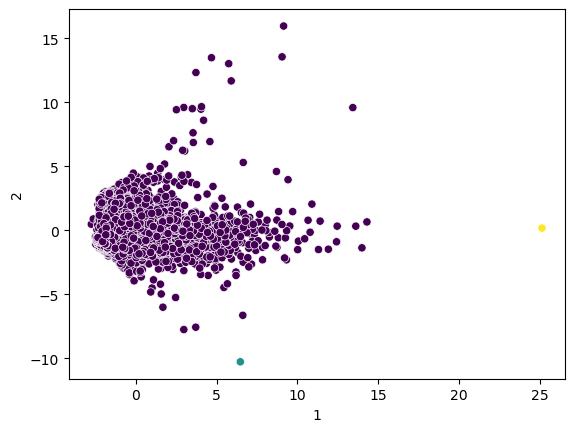

In [40]:
sns.scatterplot(x=df_pca_pd[1], y=df_pca_pd[2], c=best_cluster)
plt.show()

### Divisive Clustering

In [20]:
# Generate distance matrix with 'linkage' function
distances = linkage(df_scaled, method="complete")
print(distances)

[[4.21200000e+03 6.14700000e+03 5.17690309e-04 2.00000000e+00]
 [3.79800000e+03 5.37000000e+03 7.12852467e-04 2.00000000e+00]
 [3.96900000e+03 6.14500000e+03 7.43095511e-04 2.00000000e+00]
 ...
 [1.72650000e+04 1.72670000e+04 2.55147671e+00 3.73800000e+03]
 [1.72560000e+04 1.72680000e+04 2.63279208e+00 3.75200000e+03]
 [1.72660000e+04 1.72690000e+04 3.02231632e+00 8.63600000e+03]]


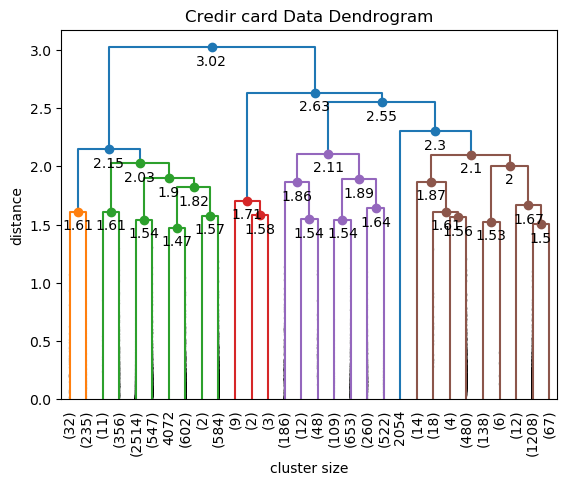

In [21]:
# Take normal dendrogram output and stylize in cleaner way

def annotated_dendrogram(*args, **kwargs):
    # Standard dendrogram from SciPy
    scipy_dendro = dendrogram(*args, truncate_mode='lastp', show_contracted=True,leaf_rotation=90.)

    plt.title('Credir card Data Dendrogram')
    plt.xlabel('cluster size')
    plt.ylabel('distance')
    
    for i, d, c in zip(scipy_dendro['icoord'], scipy_dendro['dcoord'], scipy_dendro['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        if y > 0:
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    return scipy_dendro

dn = annotated_dendrogram(distances)
plt.show()

In [22]:
# Define the parameter grid
param_grid = {
    't' : [2.0,2.40,2.45,2.55,2.65,2.70,3.0],
    'criterion' : ['distance', 'inconsistent'],
    'depth' : [1,2,3,5]
}


best_score = -1
best_params = None

# Initialize a dictionary to store silhouette scores for each parameter combination
fc_sil_scores = []
fc_sil_scores_df = pd.DataFrame()

for params in ParameterGrid(param_grid):
    # Create the Agglomerative Clustering model
    scipy_clusters = fcluster(distances, t= params['t'], criterion= params['criterion'], depth= params['depth'])

    unique_labels = len(set(scipy_clusters))
    
    if unique_labels > 1:
        # Calculate silhouette score (or other metrics)
        score = silhouette_score(df_scaled,scipy_clusters)

        # Append the score and the corresponding parameters
        fc_sil_scores.append((params, score))

        # Storing the scores with params in a DataFrame
        params_temp = params.copy()
        params_temp['score'] = score
        fc_sil_scores_df = pd.concat([fc_sil_scores_df, pd.DataFrame(params_temp, index=[0])], ignore_index=True)
        
        # Compare and store best model
        if score > best_score:
            best_score = score
            best_params = params
    else:
        print(f"Skipping t={params['t']} due to a single cluster.")

Skipping t=2.0 due to a single cluster.
Skipping t=2.4 due to a single cluster.
Skipping t=2.45 due to a single cluster.
Skipping t=2.55 due to a single cluster.
Skipping t=2.65 due to a single cluster.
Skipping t=2.7 due to a single cluster.
Skipping t=3.0 due to a single cluster.
Skipping t=2.0 due to a single cluster.
Skipping t=2.4 due to a single cluster.
Skipping t=2.45 due to a single cluster.
Skipping t=2.55 due to a single cluster.
Skipping t=2.65 due to a single cluster.
Skipping t=2.7 due to a single cluster.
Skipping t=3.0 due to a single cluster.
Skipping t=2.4 due to a single cluster.
Skipping t=2.45 due to a single cluster.
Skipping t=2.55 due to a single cluster.
Skipping t=2.65 due to a single cluster.
Skipping t=2.7 due to a single cluster.
Skipping t=3.0 due to a single cluster.


In [23]:
# Sorting Scores based on the Silhoutte Score

fc_sil_scores_df.sort_values('score', ascending=False).reset_index(drop=True)

,criterion,depth,t,score
0,distance,3,2.65,0.376460
1,distance,2,2.65,0.376460
2,distance,5,2.65,0.376460
3,distance,3,3.00,0.376460
4,distance,3,2.70,0.376460
5,distance,5,2.70,0.376460
6,distance,2,3.00,0.376460
7,distance,2,2.70,0.376460
8,distance,5,3.00,0.376460
9,distance,1,3.00,0.376460


In [24]:
# Best_cluster of Divisive Model

best_cluster_h = fcluster(distances, t=2.50, depth=5, criterion='distance')

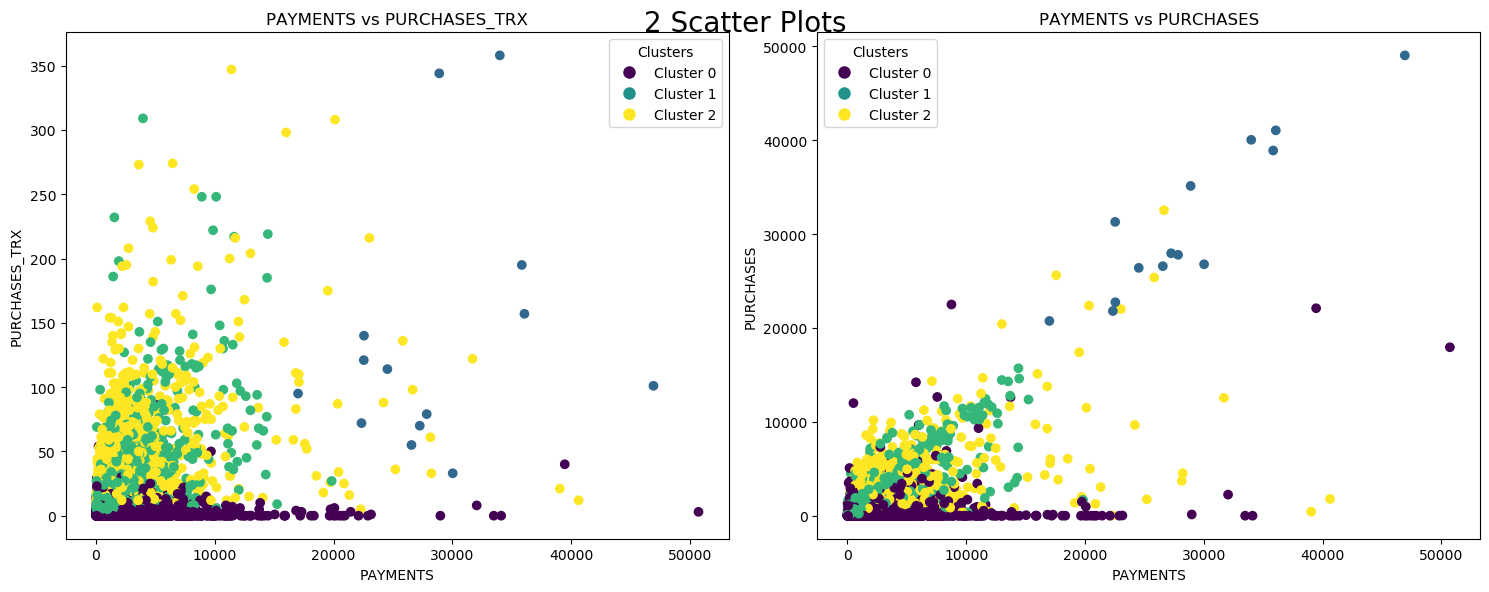

In [25]:
# Custom legend labels based on clusters
unique_clusters = np.unique(best_cluster_h)  # Extract unique cluster labels
scatter_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))  # Generate colors from cmap

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# First scatter plot
x_column = 'PAYMENTS'
y_column = 'PURCHASES_TRX'
scatter1 = ax1.scatter(df[x_column], df[y_column], c=best_cluster_h, cmap='viridis')
ax1.set_title(f"{x_column} vs {y_column}")
ax1.set_xlabel(x_column)
ax1.set_ylabel(y_column)

# Second scatter plot
x_column = 'PAYMENTS'
y_column = 'PURCHASES'
scatter2 = ax2.scatter(df[x_column], df[y_column], c=best_cluster_h, cmap='viridis')
ax2.set_title(f"{x_column} vs {y_column}")
ax2.set_xlabel(x_column)
ax2.set_ylabel(y_column)

# Adding legends to both subplots
for ax in [ax1, ax2]:
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', 
                          markersize=10, markerfacecolor=color) 
               for cluster, color in zip(unique_clusters, scatter_colors)]
    ax.legend(handles=handles, title="Clusters", loc='best')

# Global title for the figure
fig.suptitle("2 Scatter Plots", size=20)

plt.tight_layout()
plt.show()

# Conclusion

Based on the previous charts and analysis, we have chosen **Agglomerative Clustering** as it provided the most effective grouping of the data.

## Scatter-Plot

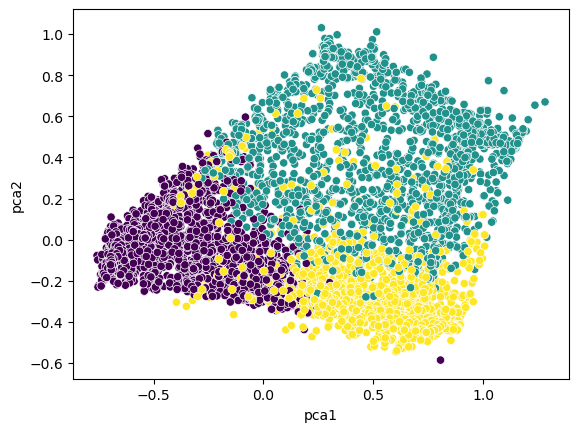

In [26]:
# Creating scatter plot according the Aglomerative Cluster 

sns.scatterplot(x=pca_data['pca1'], y=pca_data['pca2'], c=best_cluster)
plt.show()

Although this plot still shows some overlap between points, it effectively organizes the customers into three distinct and meaningful groups, offering valuable insights for segmentation.

## Histogram

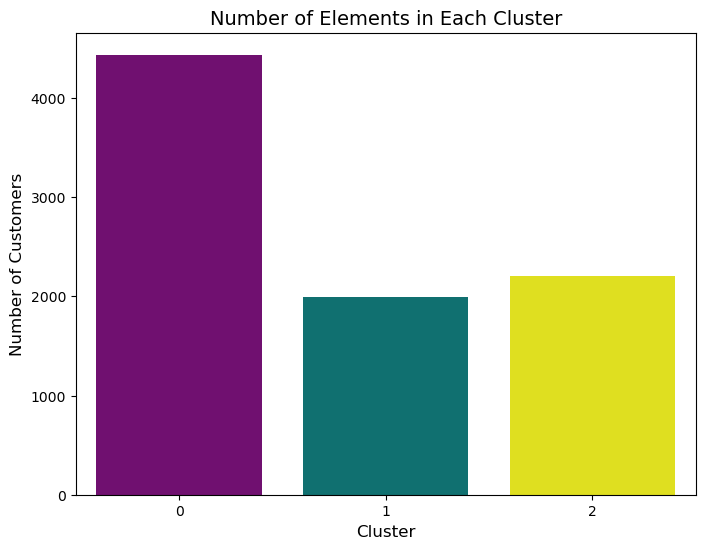

In [27]:
# Plotting the histogram using Seaborn
import seaborn as sns

# Setting the plot size
plt.figure(figsize=(8,6))

# Creating a countplot (histogram-like) for the clusters using Seaborn
sns.countplot(x=best_cluster, data=pca_data, palette=['purple', 'teal', 'yellow'])

# Adding titles and labels
plt.title('Number of Elements in Each Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Showing the plot
plt.show()


This Histogram shows that most of the people fall in the cluster 1

In [30]:
# adding new coloums in the orgnal dataset for cluster numbers

df['cluster'] = best_cluster

In [32]:
# Getting unique clusters
unique_clusters = np.unique(best_cluster)

# Create a dictionary to store DataFrames for each cluster
cluster_dataframes = {}

# Loop through each unique cluster and filter the rows belonging to that cluster
for cluster in unique_clusters:
    cluster_df = df[df['cluster'] == cluster]
    cluster_dataframes[cluster] = cluster_df  # Store in dictionary for easy access
    print(f"cluster {cluster} DataFrame created with shape: {cluster_df.shape}")

cluster 0 DataFrame created with shape: (4435, 18)
cluster 1 DataFrame created with shape: (1992, 18)
cluster 2 DataFrame created with shape: (2209, 18)


In [34]:
# Accessing each cluster
cluster_0_df = cluster_dataframes[0]  # DataFrame for Cluster 0
cluster_1_df = cluster_dataframes[1]  # DataFrame for Cluster 1
cluster_2_df = cluster_dataframes[2]  # DataFrame for Cluster 2

In [38]:
cluster_0_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.0
mean,1755.953083,0.844908,276.499457,200.699069,75.998449,1360.156870,0.143944,0.064784,0.076039,0.187443,4.453213,2.543179,4167.392482,1520.169504,859.399639,0.075797,11.528523,0.0
std,2093.985067,0.250974,842.953595,723.045434,434.662517,2275.050807,0.175296,0.101469,0.147149,0.212726,7.635161,3.860165,3385.658899,2601.654627,2181.405106,0.200638,1.285141,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.037744,0.000000,6.000000,0.0
25%,235.848666,0.727273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,350.762115,175.419381,0.000000,12.000000,0.0
50%,1103.988247,1.000000,50.000000,0.000000,0.000000,390.549563,0.083333,0.000000,0.000000,0.100000,2.000000,1.000000,3000.000000,710.854365,381.272303,0.000000,12.000000,0.0
75%,2342.063035,1.000000,288.610000,154.440000,32.070000,1822.847415,0.250000,0.083333,0.083333,0.285714,6.000000,4.000000,6000.000000,1607.906786,842.061630,0.000000,12.000000,0.0
max,16304.889250,1.000000,22500.000000,22101.780000,22500.000000,26194.049540,1.000000,0.583333,1.000000,1.500000,123.000000,41.000000,23000.000000,50721.483360,61031.618600,1.000000,12.000000,0.0


In [39]:
cluster_1_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.0
mean,1918.639997,0.979527,2796.936431,1961.109644,835.969834,675.228686,0.861309,0.663900,0.533410,0.094411,2.444779,38.922691,6202.369579,2932.096247,800.968899,0.203628,11.917671,1.0
std,2319.392808,0.069124,3634.606623,2904.380509,1390.742678,2143.106264,0.179463,0.262446,0.388382,0.177520,6.418047,37.724410,4233.896185,3982.080446,1349.033956,0.334715,0.388495,0.0
min,0.413670,0.181818,8.400000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,5.000000,300.000000,18.496532,3.197940,0.000000,8.000000,1.0
25%,366.104733,1.000000,960.730000,631.235000,60.427500,0.000000,0.750000,0.416667,0.083333,0.000000,0.000000,15.000000,3000.000000,915.514433,190.637559,0.000000,12.000000,1.0
50%,1108.914638,1.000000,1830.385000,1187.325000,403.265000,0.000000,1.000000,0.666667,0.583333,0.000000,0.000000,27.000000,5700.000000,1756.184213,363.534624,0.000000,12.000000,1.0
75%,2535.581095,1.000000,3311.205000,2273.007500,1061.875000,386.792936,1.000000,0.916667,0.916667,0.090909,2.000000,48.000000,8500.000000,3425.692960,928.413503,0.250000,12.000000,1.0
max,19043.138560,1.000000,49039.570000,40761.250000,15497.190000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,46930.598240,21235.065300,1.000000,12.000000,1.0


In [40]:
cluster_2_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.0
mean,1004.343764,0.919483,931.586455,193.435057,738.840978,547.011569,0.873398,0.076243,0.808216,0.076493,1.810321,18.566772,3719.000576,1280.246894,931.267561,0.286989,11.200543,2.0
std,1738.471117,0.160686,1029.927781,530.370577,819.335074,1582.564461,0.164685,0.152480,0.224718,0.171894,5.206494,18.048526,3120.486879,1907.543763,3287.706692,0.359612,1.739117,0.0
min,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,16.385421,0.019163,0.000000,6.000000,2.0
25%,51.581189,0.909091,320.000000,0.000000,265.800000,0.000000,0.750000,0.000000,0.666667,0.000000,0.000000,10.000000,1500.000000,342.843624,144.687135,0.000000,12.000000,2.0
50%,218.948323,1.000000,582.280000,0.000000,483.300000,0.000000,1.000000,0.000000,0.875000,0.000000,0.000000,12.000000,2500.000000,725.606194,180.755765,0.083333,12.000000,2.0
75%,1204.102388,1.000000,1155.000000,126.240000,916.500000,56.662525,1.000000,0.083333,1.000000,0.083333,1.000000,21.000000,5000.000000,1487.081970,654.573104,0.555556,12.000000,2.0
max,16115.596400,1.000000,12375.000000,6520.000000,12375.000000,18857.058470,1.000000,1.000000,1.000000,1.000000,71.000000,254.000000,21500.000000,40627.595240,76406.207520,1.000000,12.000000,2.0


---

###  **Cluster 2 - Low Activity Customers**  
These customers typically exhibit:
- **Low balances**  
- **Minimal purchases**  
- **Low payments**  

**Key Insights**:  
They rarely use their credit cards, indicating low reliance on credit for their daily financial activities.

---

###  **Cluster 0 - Moderate Activity Customers**  
This group represents **moderate users** of credit cards. They tend to have:
- **Mid-range balances**  
- **Moderate purchases**  
- **Balanced payments**

**Key Insights**:  
Their credit card usage is consistent but not aggressive, suggesting a stable financial behavior with moderate spending.

---

###  **Cluster 1 - High Activity Customers**  
These are the **high spenders** who:
- **Maintain higher balances**  
- **Engage in large one-off purchases**  
- **Make frequent payments**  

**Key Insights**:  
They are heavy credit card users, frequently making large transactions, and may use their cards for both personal and business-related expenses.

---